In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

# **Data Preprocessing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
#Check null values
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
#Check for duplicate values
df.duplicated().sum()

0

In [7]:
#Converting 'policy_tenure' column into months by dividing each value by 12
df["policy_tenure"] = np.round(df["policy_tenure"] * 12)

In [8]:
#Converting 'age_of_car' column into months by dividing each value by 12
df["age_of_car"] = np.round(df["age_of_car"] * 12)

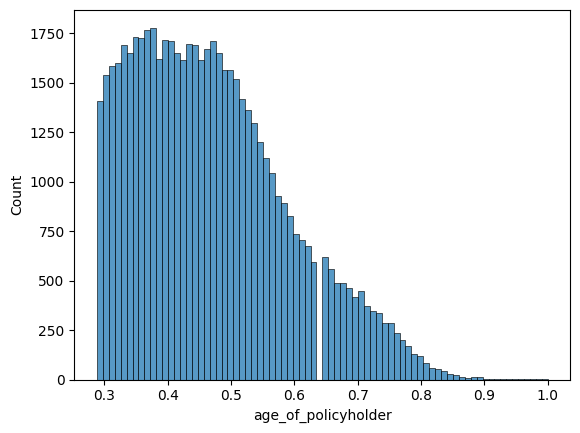

In [9]:
sns.histplot(data=df, x='age_of_policyholder')
plt.show()
# Since the values lie between 0.28 and 1.00, the column seems to be normalized and keeping the same

In [10]:
# Dropping the 'policy_id' column from the DataFrame along the columns axis as all values are unique
df.drop(columns='policy_id', axis=1, inplace=True)

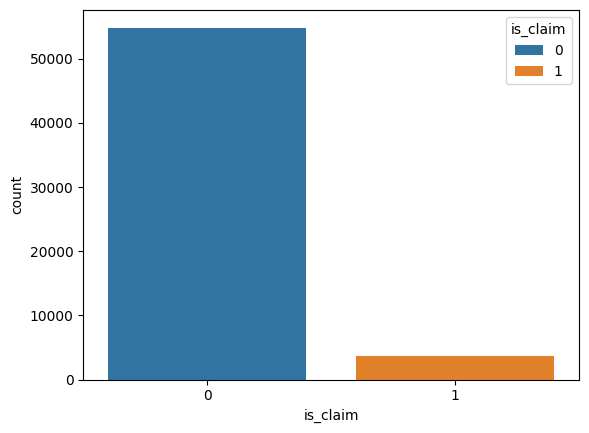

In [11]:
#Plot to visualize Target value 'is_claim
sns.countplot(data=df, x='is_claim', hue='is_claim')
plt.show()

# **Exploratory Data Analysis**

In [12]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,7.327263,0.775072,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,4.990472,0.788357,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.000000,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,3.000000,0.000000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,7.000000,1.000000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,12.000000,1.000000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,17.000000,12.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


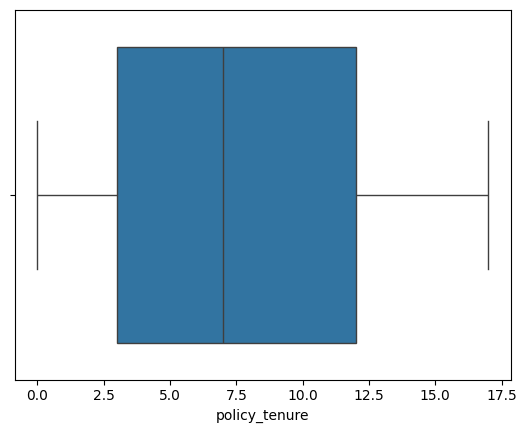

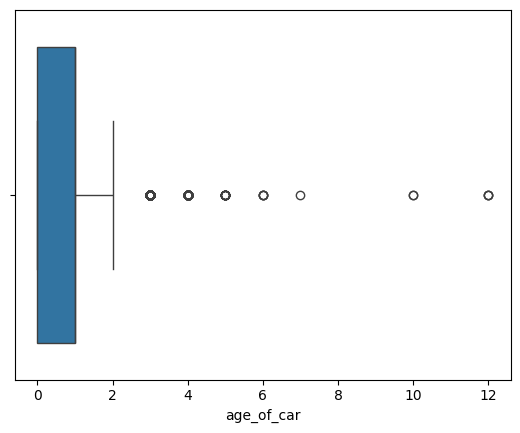

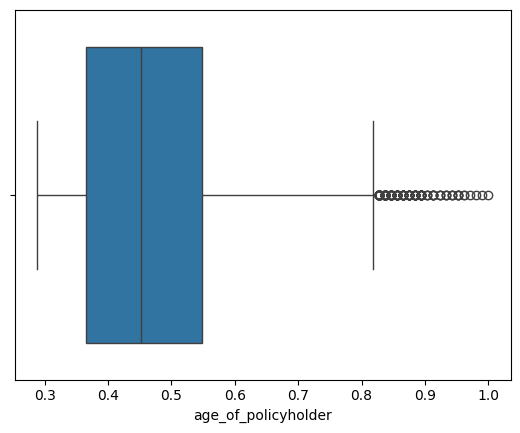

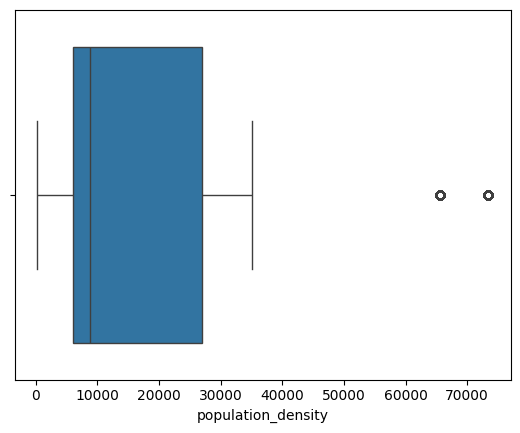

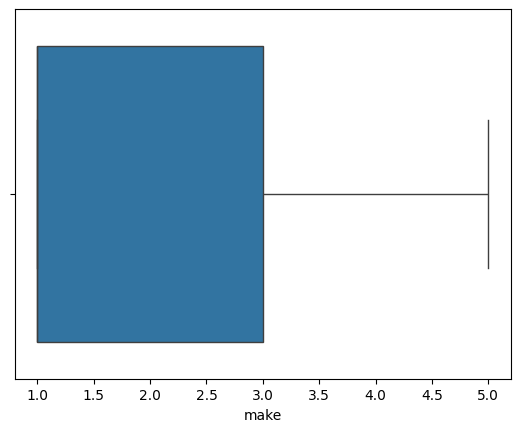

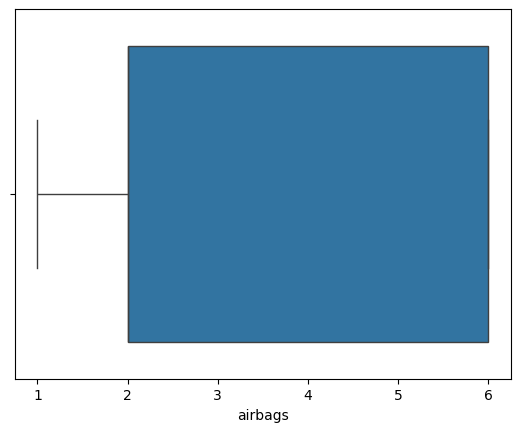

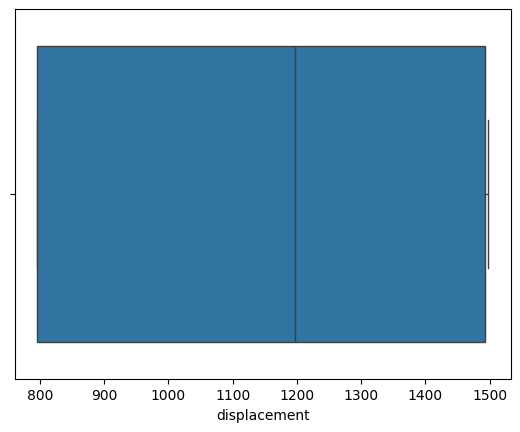

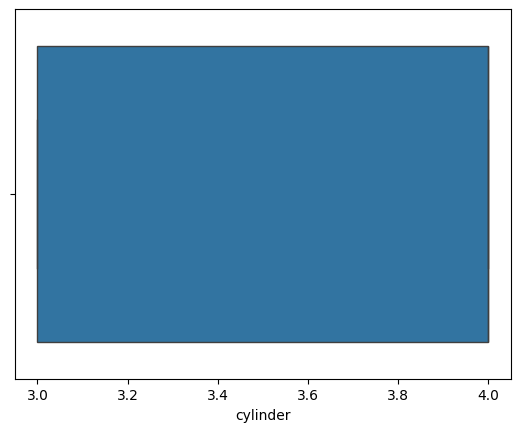

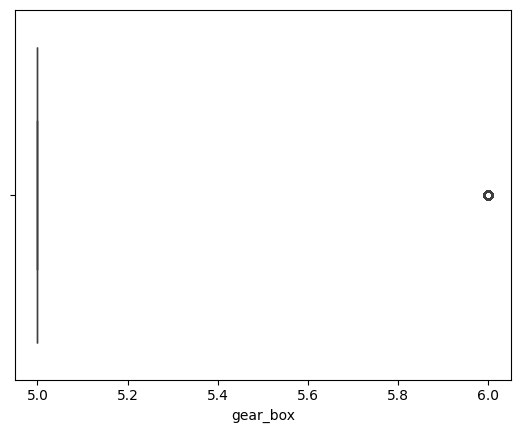

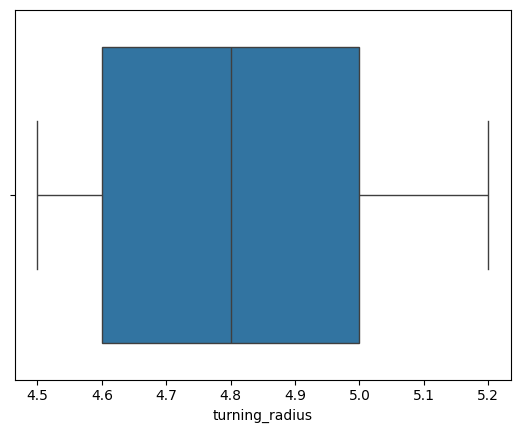

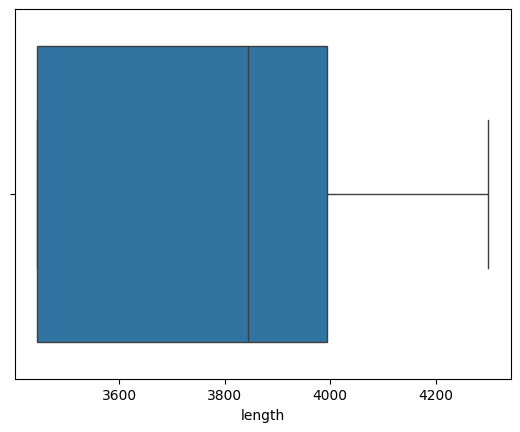

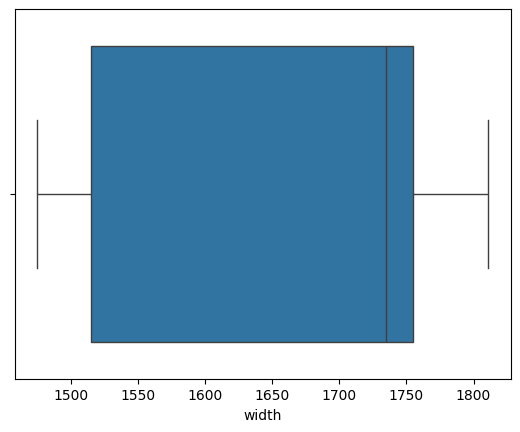

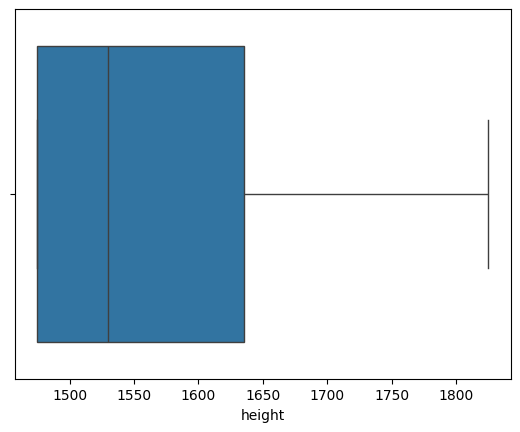

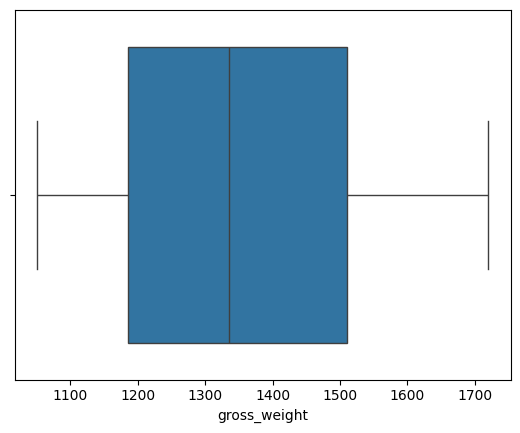

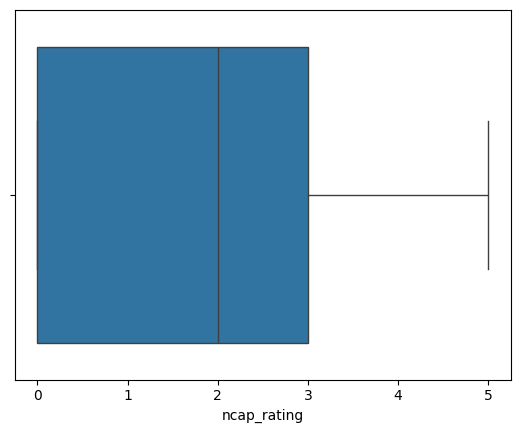

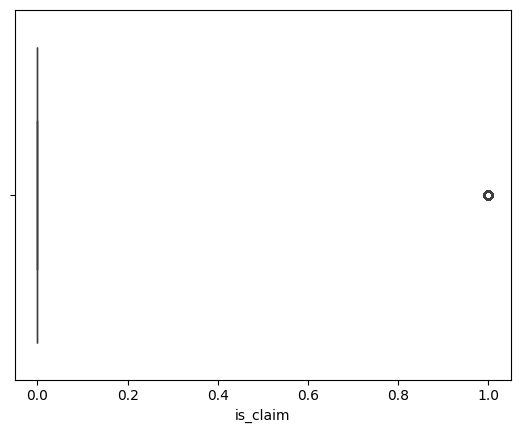

In [13]:
# Check for outliers using boxplots
for column in df.select_dtypes(include=['int64', 'float64']):
  sns.boxplot(x=df[column])
  plt.show()
  print("\n")

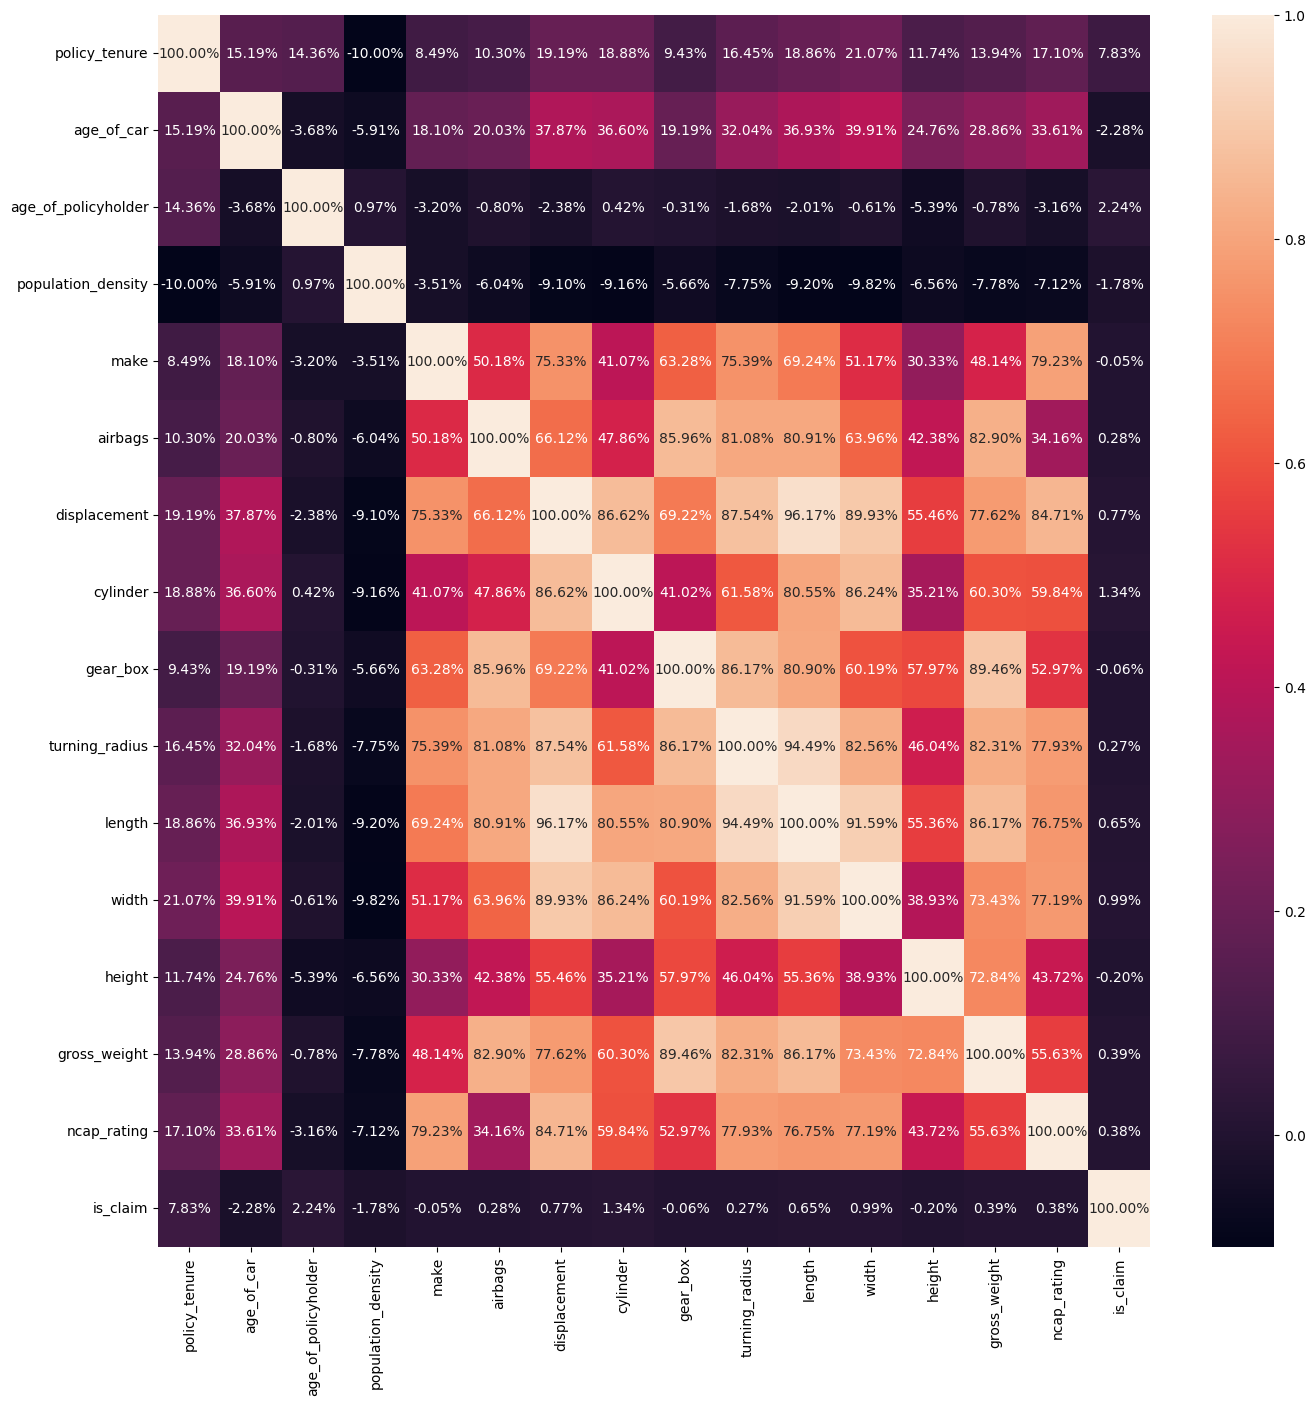

In [14]:
# Check for correlations between numerical columns
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".02%")
plt.show()

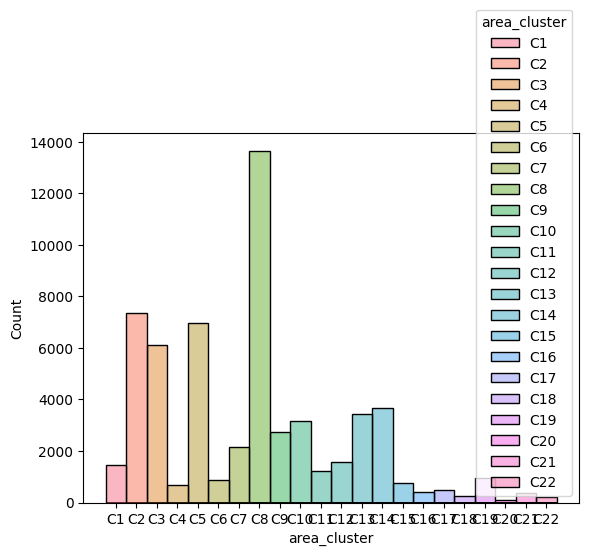

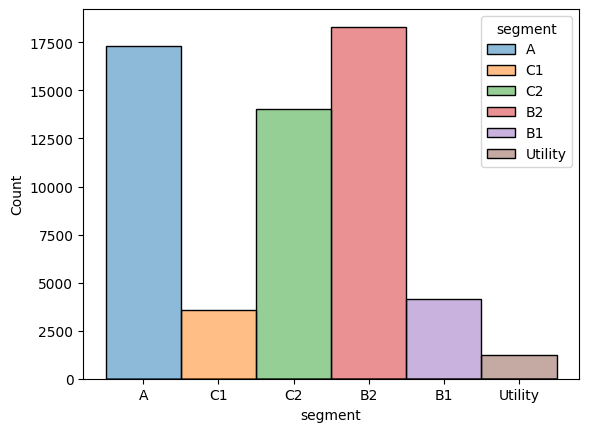

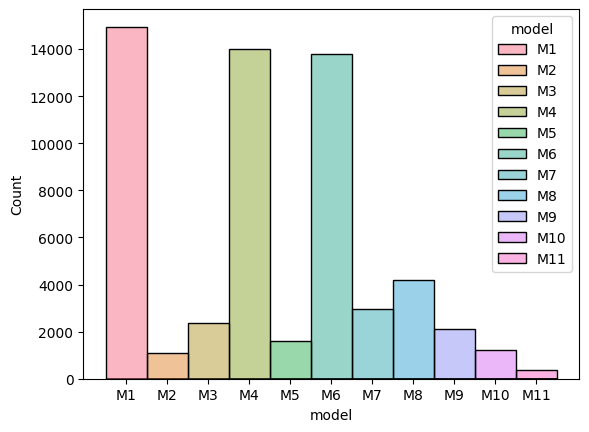

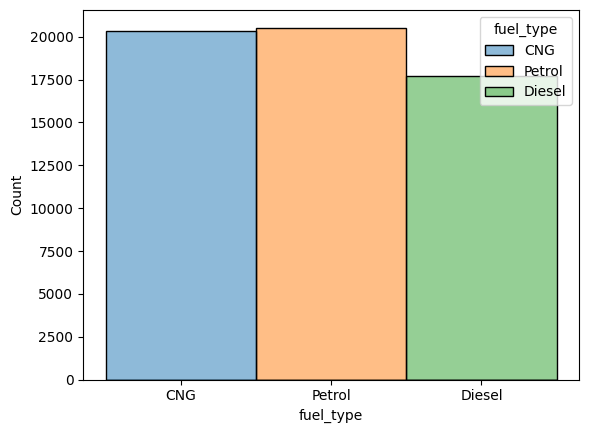

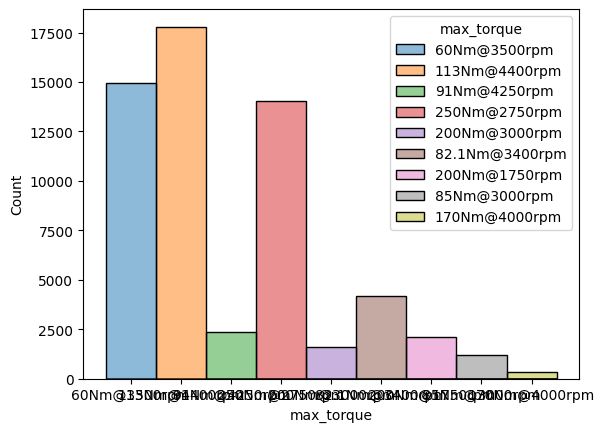

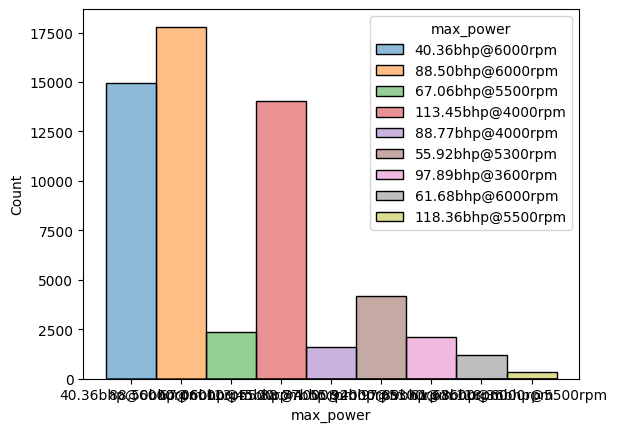

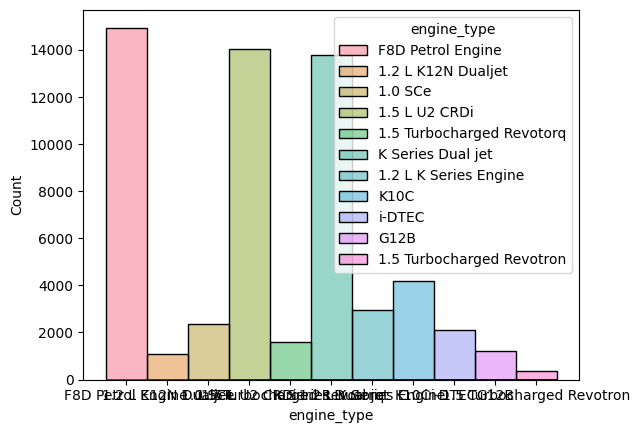

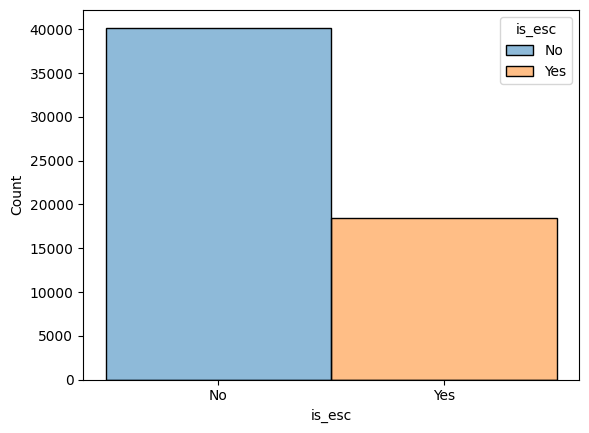

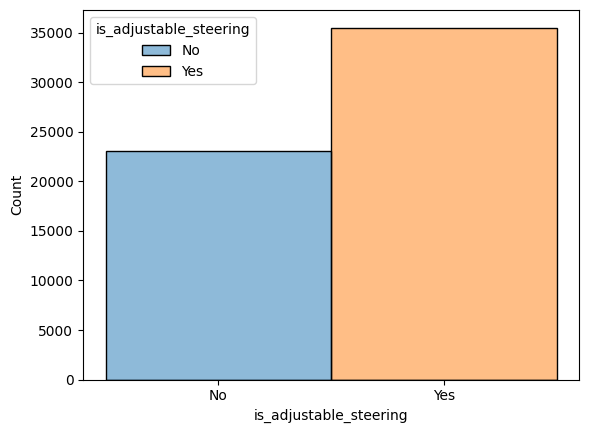

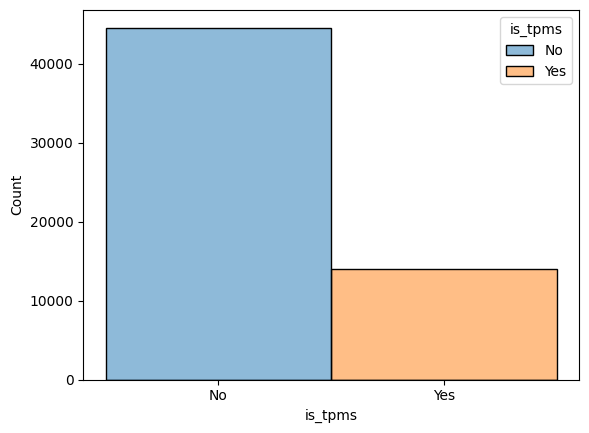

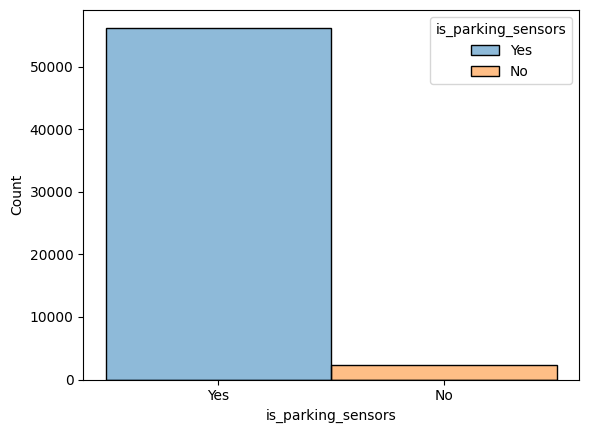

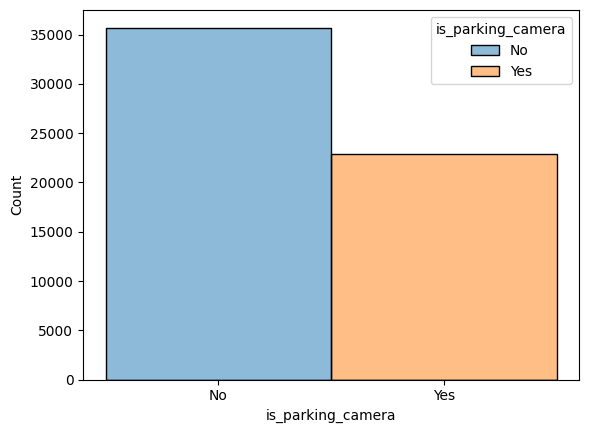

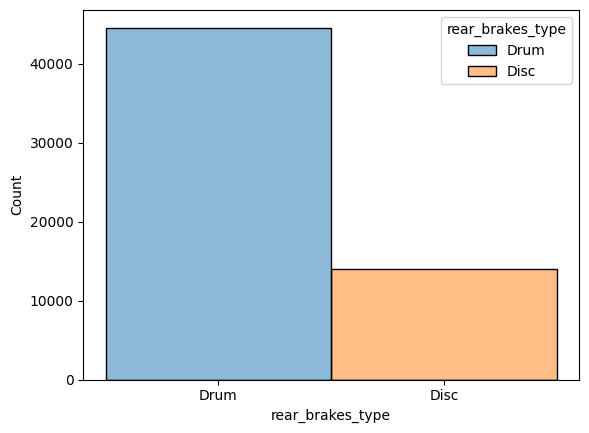

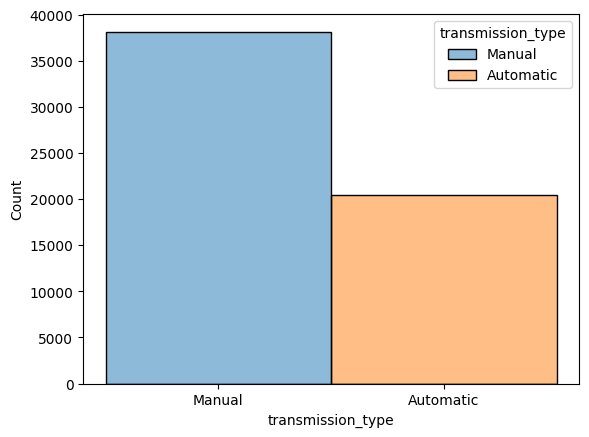

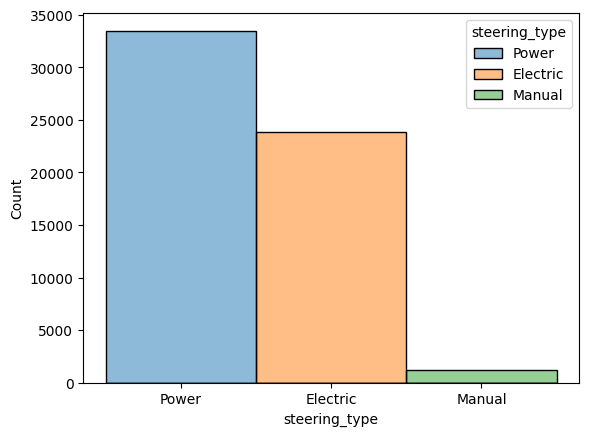

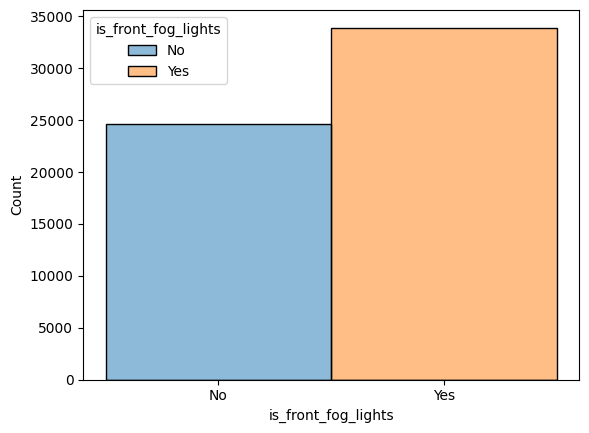

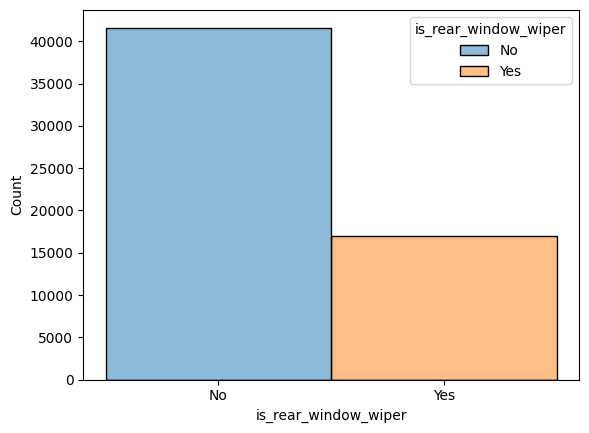

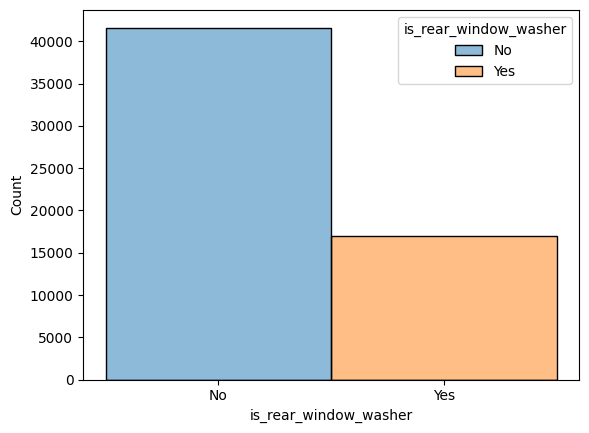

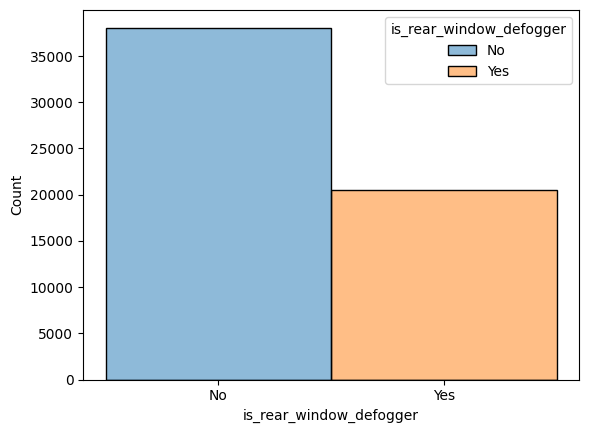

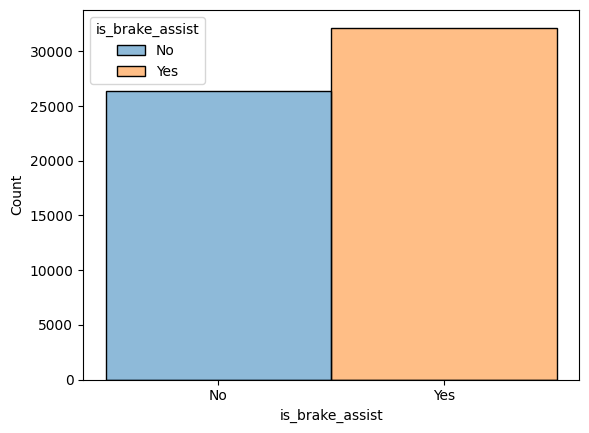

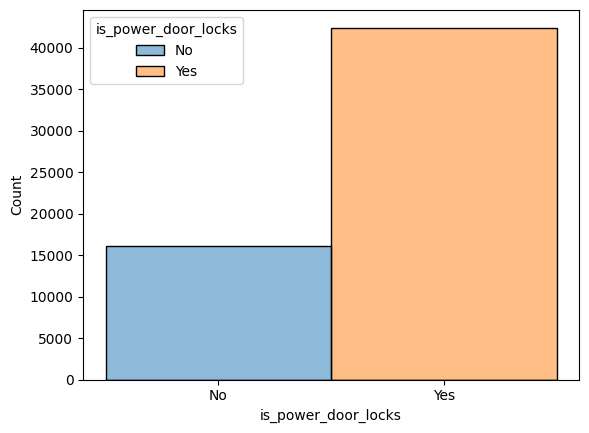

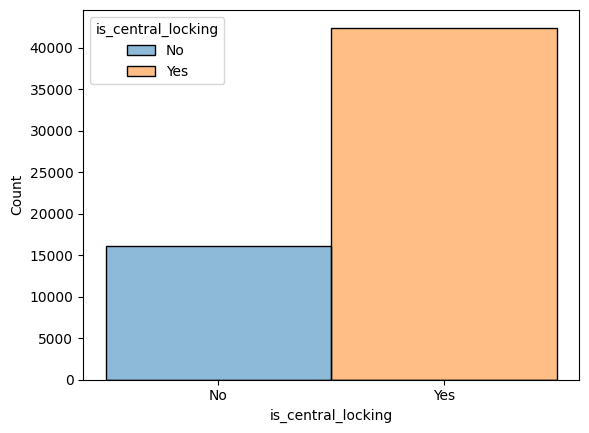

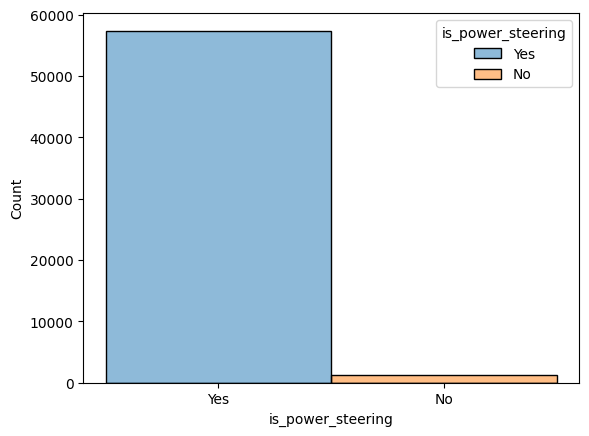

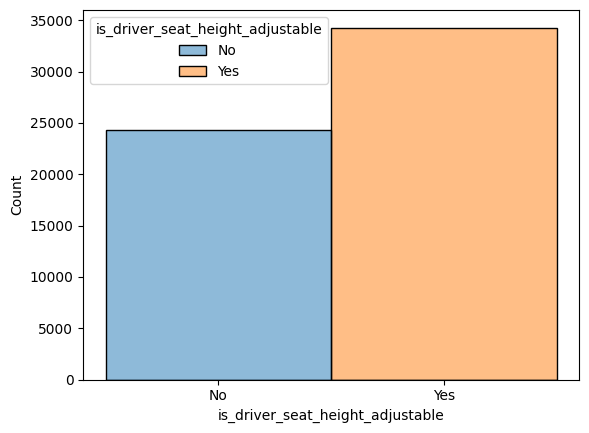

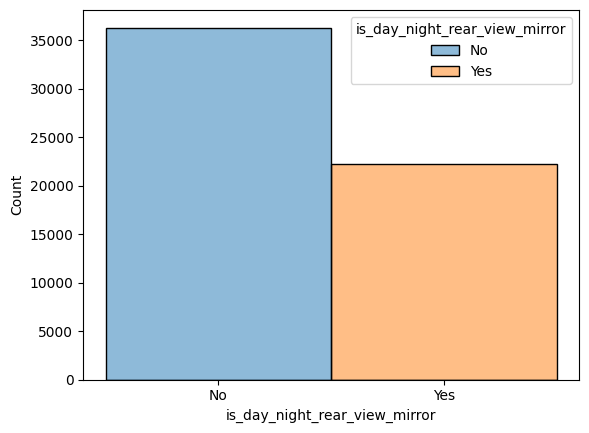

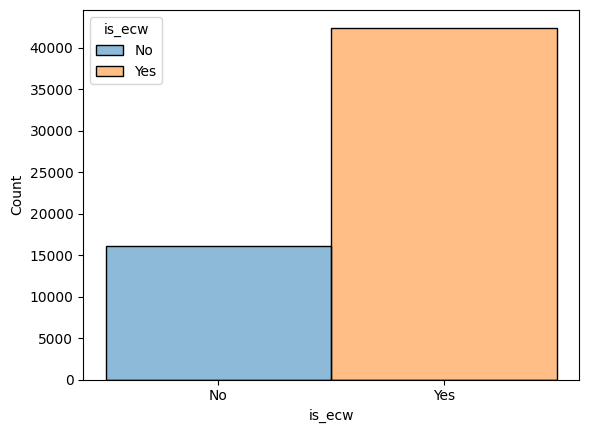

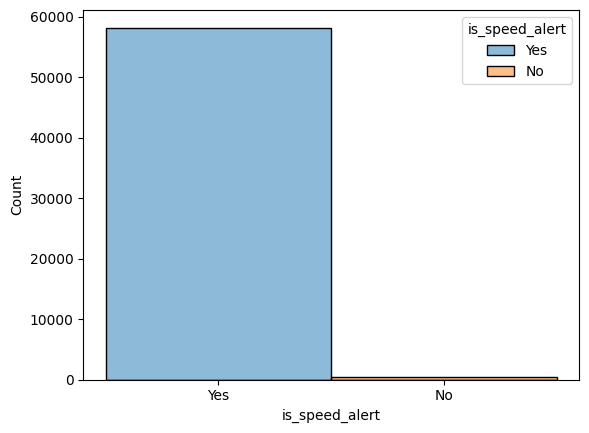

In [15]:
# Check for outliers using boxplots
for column in df.select_dtypes(include=['object']):
  sns.histplot(data=df, x=df[column], hue=column)
  plt.show()
  print("\n")

**Oversampling Minority Class**

In [16]:
df["is_claim"].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [17]:
#Oversampling minority class
from sklearn.utils import resample

minority = df[df["is_claim"] == 1]
majority = df[df["is_claim"] == 0]

minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

df_oversampled = pd.concat([majority, minority_oversampled])

df_oversampled["is_claim"].value_counts()

is_claim
0    54844
1    54844
Name: count, dtype: int64

# **Feature Engineering**

In [18]:
#Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()

encoded_data = df.apply(lambda col: lab_encoder.fit_transform(col) if col.dtype == 'object' else col)

X = encoded_data.drop('is_claim', axis=1)
y = encoded_data['is_claim']

In [19]:
#Scale
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [20]:
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

features_df = features_df.sort_values(by='Importance', ascending=False)

features_df.head(10)

,Feature,Importance
2,age_of_policyholder,0.564678
0,policy_tenure,0.241412
4,population_density,0.069907
3,area_cluster,0.069253
1,age_of_car,0.047032
7,model,0.000555
27,height,0.000490
26,width,0.000455
25,length,0.000454
11,engine_type,0.000447


In [21]:
# Modeling with oversampled data with limited features

best_features = ['age_of_policyholder', 'policy_tenure', 'population_density', 'area_cluster', 'age_of_car', 'model', 'height', 'width', 'length', 'engine_type', 'is_claim']

oversampled_data = df_oversampled[best_features]

encoded_data = oversampled_data.apply(lambda col: lab_encoder.fit_transform(col) if col.dtype == 'object' else col)

X_oversampled = encoded_data.drop('is_claim', axis=1)
y_oversampled = encoded_data['is_claim']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10,15,20,25,30,35],
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

In [24]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = 0.9359102926429027

classification_report = 
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     16574
           1       0.89      0.99      0.94     16333

    accuracy                           0.94     32907
   macro avg       0.94      0.94      0.94     32907
weighted avg       0.94      0.94      0.94     32907




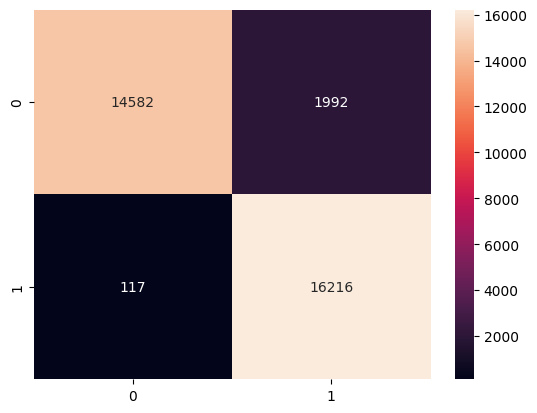

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("accuracy = " + str(accuracy) + "\n")
print("classification_report = \n" + str(class_report) + "\n")
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

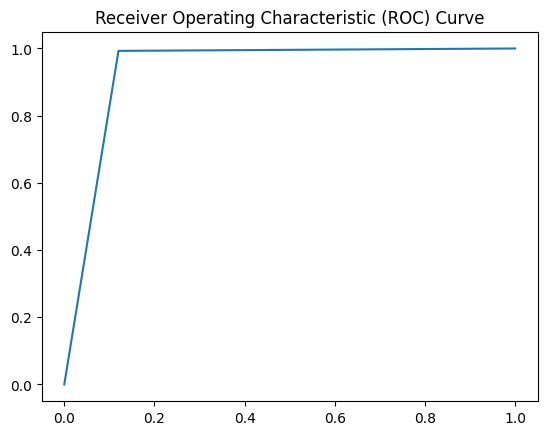

In [26]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'ROC curve (AUC = {np.round(roc_auc, 2)})')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.show()

plot_roc_curve(y_test, y_pred)

In [27]:
# Modeling with oversampled data with all features

oversampled_data = df_oversampled

encoded_data = oversampled_data.apply(lambda col: lab_encoder.fit_transform(col) if col.dtype == 'object' else col)

X_oversampled = encoded_data.drop('is_claim', axis=1)
y_oversampled = encoded_data['is_claim']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

In [29]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = 0.9345731911143526

classification_report = 
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     16574
           1       0.89      0.99      0.94     16333

    accuracy                           0.93     32907
   macro avg       0.94      0.93      0.93     32907
weighted avg       0.94      0.93      0.93     32907




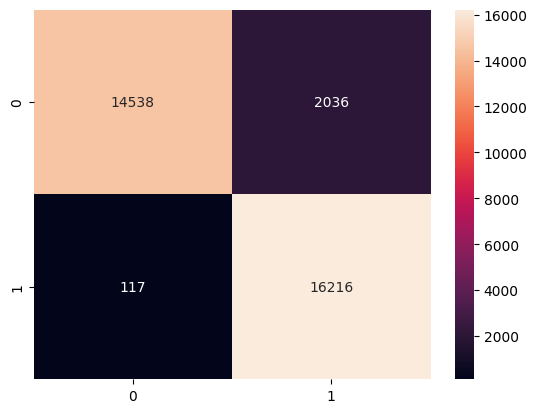

In [30]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("accuracy = " + str(accuracy) + "\n")
print("classification_report = \n" + str(class_report) + "\n")
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

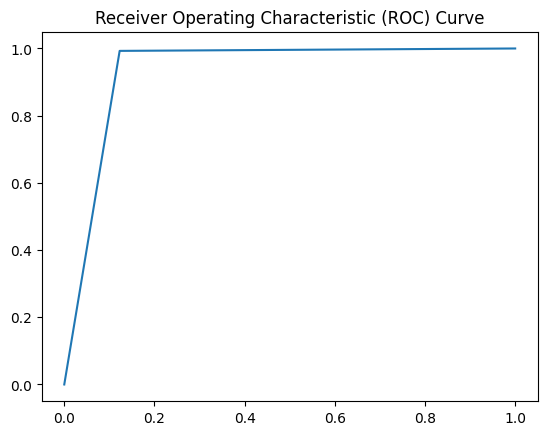

In [31]:
plot_roc_curve(y_test, y_pred)